In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = {
    'Gene': ['TP53', 'BRCA1', 'EGFR', 'MYC', 'CDK2'],
    'Expression_Level': [7.2, 5.5, 8.1, 6.3, 4.9],
    'Tissue': ['Liver', 'Breast', 'Lung', 'Brain', 'Liver'],
    'Condition': ['Healthy', 'Cancer', 'Cancer', 'Healthy', 'Cancer']
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Gene,Expression_Level,Tissue,Condition
0,TP53,7.2,Liver,Healthy
1,BRCA1,5.5,Breast,Cancer
2,EGFR,8.1,Lung,Cancer
3,MYC,6.3,Brain,Healthy
4,CDK2,4.9,Liver,Cancer


In [6]:
df.rename(columns={'Expression_Level': 'Expr'}, inplace=True)
df['Expr_Norm'] = df['Expr'] / df['Expr'].max()
df['Tissue'] = df['Tissue'].replace({'Liver': 'Hepatic'})

In [7]:
df

,Gene,Expr,Tissue,Condition,Expr_Norm
0,TP53,7.2,Hepatic,Healthy,0.888889
1,BRCA1,5.5,Breast,Cancer,0.679012
2,EGFR,8.1,Lung,Cancer,1.000000
3,MYC,6.3,Brain,Healthy,0.777778
4,CDK2,4.9,Hepatic,Cancer,0.604938


In [8]:
cancer_df = df.query("Condition == 'Cancer'")

In [9]:
cancer_df

,Gene,Expr,Tissue,Condition,Expr_Norm
1,BRCA1,5.5,Breast,Cancer,0.679012
2,EGFR,8.1,Lung,Cancer,1.000000
4,CDK2,4.9,Hepatic,Cancer,0.604938


In [10]:
grouped = df.groupby('Tissue').agg({'Expr': ['mean', 'max']})

In [11]:
grouped

Expr     
         mean  max
Tissue            
Brain    6.30  6.3
Breast   5.50  5.5
Hepatic  6.05  7.2
Lung     8.10  8.1

In [12]:
missing_data = {
    'SampleID': ['P1', 'P2', 'P3', 'P4'],
    'Age': [35, 42, None, 58],
    'BiomarkerA': [1.2, 1.5, 1.1, None],
    'BiomarkerB': [15.2, 16.5, 14.8, 17.1]
}
missing_df = pd.DataFrame(missing_data)
print("Original DataFrame with Missing Data:")
print(missing_df)

Original DataFrame with Missing Data:
  SampleID   Age  BiomarkerA  BiomarkerB
0       P1  35.0         1.2        15.2
1       P2  42.0         1.5        16.5
2       P3   NaN         1.1        14.8
3       P4  58.0         NaN        17.1


In [13]:
print("\nMissing values per column:")
print(missing_df.isnull().sum())


Missing values per column:
SampleID      0
Age           1
BiomarkerA    1
BiomarkerB    0
dtype: int64


In [14]:
df_dropped = missing_df.dropna()
print("DataFrame after dropping rows with missing values:")
print(df_dropped)

DataFrame after dropping rows with missing values:
  SampleID   Age  BiomarkerA  BiomarkerB
0       P1  35.0         1.2        15.2
1       P2  42.0         1.5        16.5


In [15]:
mean_age = missing_df['Age'].mean()
median_biomarker_a = missing_df['BiomarkerA'].median()

In [17]:
mean_age

np.float64(45.0)

In [18]:
median_biomarker_a

np.float64(1.2)

In [19]:
df_filled = missing_df.fillna(value={'Age': mean_age, 'BiomarkerA': median_biomarker_a})

In [21]:
print(df_filled)

  SampleID   Age  BiomarkerA  BiomarkerB
0       P1  35.0         1.2        15.2
1       P2  42.0         1.5        16.5
2       P3  45.0         1.1        14.8
3       P4  58.0         1.2        17.1


In [22]:
import matplotlib.pyplot as plt

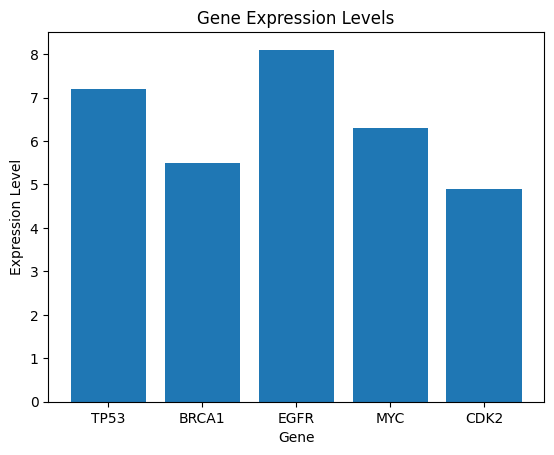

In [26]:
df = pd.DataFrame(data)

plt.bar(df['Gene'], df['Expression_Level'])
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.title('Gene Expression Levels')
plt.show()

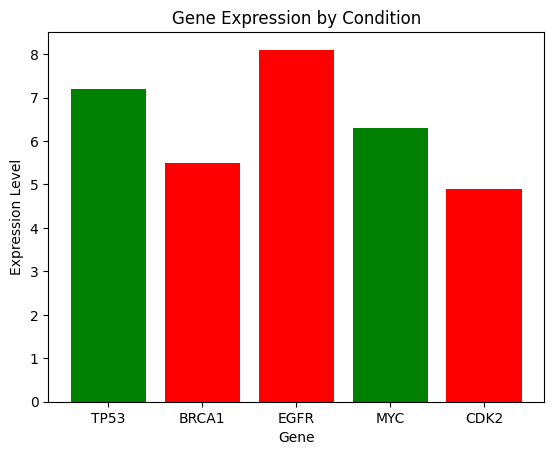

In [27]:
colors = df['Condition'].map({'Healthy': 'green', 'Cancer': 'red'})

plt.figure()
plt.bar(df['Gene'], df['Expression_Level'], color=colors)
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.title('Gene Expression by Condition')
plt.show()

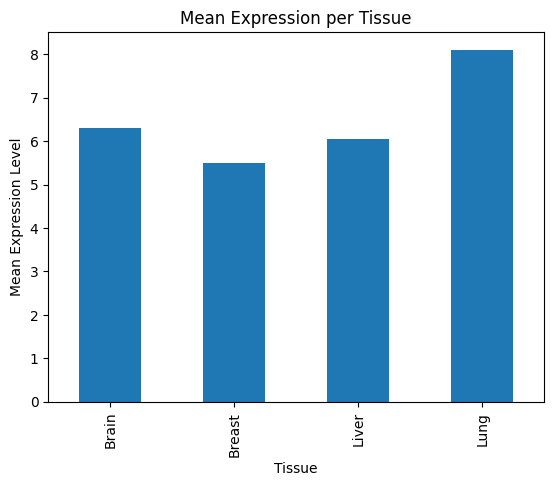

In [28]:
df.groupby('Tissue')['Expression_Level'].mean().plot(kind='bar')
plt.ylabel('Mean Expression Level')
plt.title('Mean Expression per Tissue')
plt.show()